# Homework 3: Feature Engineering, KNN, and Decision Trees

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis


*Wine classification dataset from the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine*

*Sea level dataset from NASA's climate change repository: https://climate.nasa.gov/vital-signs/*

## Preamble

Download the `hw3` folder from here: https://github.com/nfrumkin/EC414/tree/master/homework/hw3 (or clone the EC414 repository, if you prefer).

To run and solve this assignment, you must have a working Jupyter Notebook installation.

If you followed the installation instructions for `Python 3.6.x` and `Jupyter Notebook` from discussion 1, you should be set. In a terminal (cmd or Powershell for Windows users), navigate to the `hw3` folder. Then type `jupyter notebook` and press `Enter`.

If you have Anaconda, run Anaconda and choose this file (`EC414_HW3.ipynb`) in Anaconda's file explorer. Use `Python 3` version.

Below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find [Week 1 discussion material](https://github.com/nfrumkin/EC414/blob/master/discussions/Week%201%20-%20Python%20Review.ipynb) useful. 

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]` ("play") button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. [Double] click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file(s) to Blackboard by the due date (see Schedule).

# Problem 1: Feature Engineering

Given the sea level rise data over the past 25 years as a training set (`sealevel_train.csv`) and the past year's sea level rise data as a testing set (`sealevel_test.csv`):

**a.** Apply Ordinary Least Squares regression on the training data. Plot both the training data and the regression curve on the same figure. *(Hint: use your code from Homework 2!)*

**b.** Using the testing set, calculate the mean squared error (MSE) between the ground truth testing data and the prediction given by your regression curve from part a. Recall that the mean squared error is given by $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$, where $y$ is the vector of $n$ observed values and $\hat{y}$ is the vector of $n$ predictions.

**c.** In machine learning, we often manipulate the raw data into some intermediary form to create a more robust feature representation. Repeat parts a. and b. for each of the following data transformations. *Be sure to apply the same transformation to the testing set before finding the MSE between the test data and the prediction.*

* Apply a rolling mean with a window size of 5, 7, and 15. This transformation is given by $x_j = \sum_{k=i}^{i+window size}(\frac{x_k}{windowsize})$. With the $n$ data points given, pad the final values with zero. (For example, the mean at $n-2$ includes points $n-2$, $n-1$, and $n$, and will be 0 for $n+1$ and $n+2$ because we do not have data for those points.)

* Apply first order differencing. The transformation is given by $x_{j} = x_i - x_{i-1}$ for every data point $x_i$ in the dataset, excluding the first data point.

* One other data transformation of your choice. *Be sure to explain your transformation.*

In [4]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [5]:
# Read training set
sea_level_df = pd.read_csv("sealevel_train.csv")
sea_level_df.head()

,time,level_variation
0,1993.011526,-37.52
1,1993.038692,-38.05
2,1993.065858,-37.61
3,1993.093025,-37.49
4,1993.120191,-36.48


In [6]:
# Read testing set
sea_level_df_test = pd.read_csv("sealevel_test.csv")
sea_level_df_test.head()

,time,level_variation
0,2013.453940,26.31
1,2013.481106,26.32
2,2013.508272,26.44
3,2013.535439,26.54
4,2013.562605,26.49


<class 'pandas.core.frame.DataFrame'>
Coeffs: [[2.90021144]]
Intercept: [-5815.0064476]
The predicted value for 2013 [[24.43570164]]


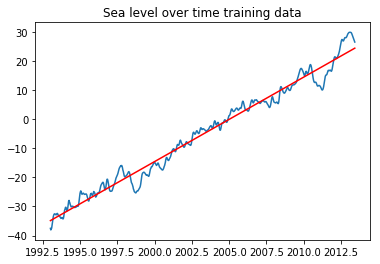

In [7]:
# Part a - Fit linear regression model to training data (find OLS coefficients) #

# Read training set

X = sea_level_df[['time']]
Y = sea_level_df[['level_variation']] 
print(type(X))



LR = LinearRegression().fit(X,Y)
LR.score(X, Y)

print("Coeffs:", LR.coef_)
print("Intercept:", LR.intercept_)


# Predict using OLS model

year_predict = 2013.453940

predict_val = year_predict*LR.coef_ + LR.intercept_
predict_vector = LR.coef_*X + LR.intercept_

print("The predicted value for 2013", predict_val)



# Plot training data along with the regression curve
plt.title ("Sea level over time training data")
plt.plot(X,Y)
plt.plot(X,predict_vector,'r') 





The predicted value for year_predict [[24.43570164]]
Mean squared error is: [90.73366367]


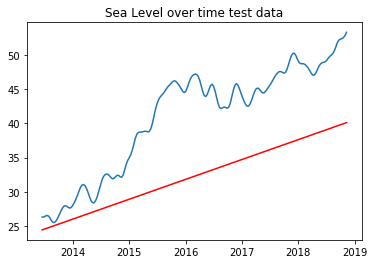

In [109]:
# Part b - Prediction of testing points #
A = sea_level_df_test[['time']]
B = sea_level_df_test[['level_variation']] 



year_predict = 2013.453940

predict_val = year_predict*LR.coef_ + LR.intercept_
predict_vector = LR.coef_*A + LR.intercept_

print("The predicted value for year_predict", predict_val)

# Plot training data along with the regression curve
plt.title ("Sea Level over time test data")
plt.plot(A,B)
plt.plot(A,predict_vector,'r') 



# Calculate mean squared error between ground truth and predictions


print("Mean squared error is:" ,mean_squared_error(B,predict_vector, multioutput='raw_values'))





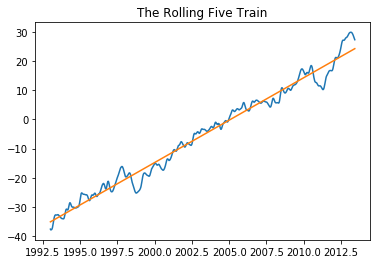

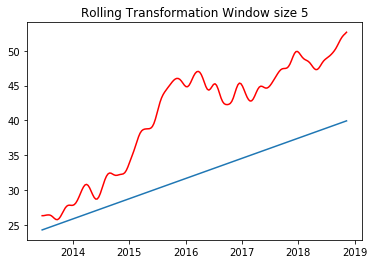

Coeffs: [[2.90025083]]
Intercept: [-5815.2568685]
Mean squared error is: [89.06173399]


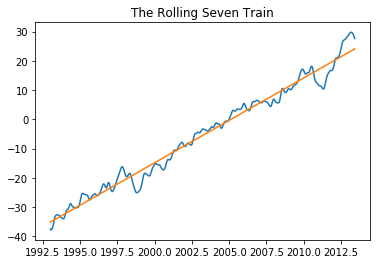

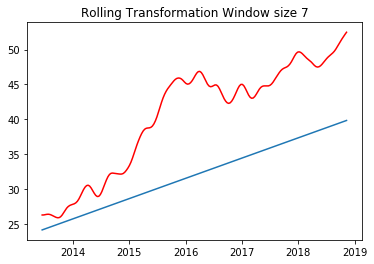

Mean squared error is: [88.33453555]
Coeffs: [[2.89977081]]
Intercept: [-5814.38195573]


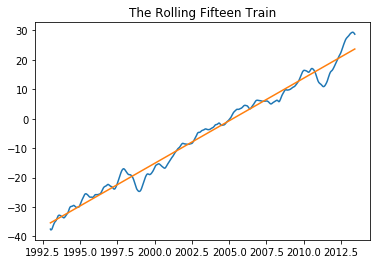

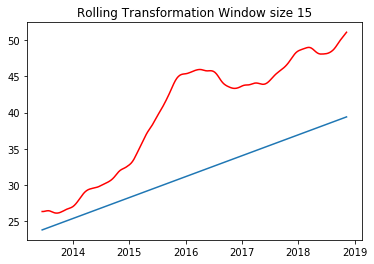

Mean squared error is: [86.8727279]
Coeffs: [[2.89369057]]
Intercept: [-5802.54912522]


In [110]:
# Part c - data transformations #
# ROLLING MEAN

#training
rolling_five = Y.rolling(5,min_periods=1).mean()
rolling_seven = Y.rolling(7,min_periods=1).mean()
rolling_fif = Y.rolling(15,min_periods=1).mean()


#test
rolling_five_t = B.rolling(5,min_periods=1).mean()
rolling_seven_t = B.rolling(7,min_periods=1).mean()
rolling_fif_t = B.rolling(15,min_periods=1).mean()



#apply OLS

####################################
#Rolling 5
ols5 = LinearRegression().fit(X,rolling_five);
ols5.score(X, rolling_five)

roll5_vector = ols5.coef_*X + ols5.intercept_

plt.plot(X,rolling_five)
plt.plot(X,roll5_vector)
plt.title("The Rolling Five Train")
plt.show()


roll5_vector_test = ols5.coef_*A + ols5.intercept_

plt.plot(A,rolling_five_t, 'r')
plt.plot(A,roll5_vector_test)
plt.title("Rolling Transformation Window size 5")
plt.show()

print("Coeffs:", ols5.coef_)
print("Intercept:", ols5.intercept_)
print("Mean squared error is:" ,mean_squared_error(rolling_five_t,roll5_vector_test, multioutput='raw_values'))

####################################
#Rolling 7

ols7 = LinearRegression().fit(X,rolling_seven);
ols7.score(X, rolling_seven)

roll7_vector = ols7.coef_*X + ols7.intercept_

plt.plot(X,rolling_seven)
plt.plot(X,roll7_vector)
plt.title("The Rolling Seven Train")
plt.show()

roll7_vector_test = ols7.coef_*A + ols7.intercept_

plt.plot(A,rolling_seven_t, 'r')
plt.plot(A,roll7_vector_test)
plt.title("Rolling Transformation Window size 7")
plt.show()
print("Mean squared error is:" ,mean_squared_error(rolling_seven_t,roll7_vector_test, multioutput='raw_values'))
print("Coeffs:", ols7.coef_)
print("Intercept:", ols7.intercept_)


########################################
#Rolling 7

ols15 = LinearRegression().fit(X,rolling_fif);
ols15.score(X, rolling_fif)

roll15_vector = ols15.coef_*X + ols15.intercept_

plt.plot(X,rolling_fif)
plt.plot(X,roll15_vector)
plt.title("The Rolling Fifteen Train")
plt.show()


roll15_vector_test = ols15.coef_*A + ols15.intercept_


plt.plot(A,rolling_fif_t, 'r')
plt.plot(A,roll15_vector_test)
plt.title("Rolling Transformation Window size 15")
plt.show()
print("Mean squared error is:" ,mean_squared_error(rolling_fif_t,roll15_vector_test, multioutput='raw_values'))
print("Coeffs:", ols15.coef_)
print("Intercept:", ols15.intercept_)




# Repeat parts a and b for rolling mean



# Calculate mean squared error between ground truth and predictions





Coeffs: [[-0.00017894]]
Intercept: [0.44354178]
The predicted value for year_predict [[0.08324763]]
Mean squared error is: [0.16569699]


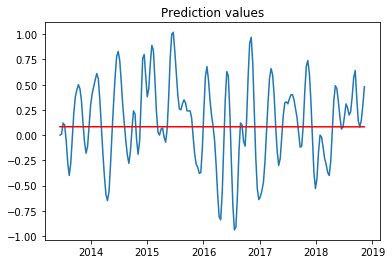

In [111]:
# Part c - data transformations #
# FIRST ORDER DIFFERENCING

X = sea_level_df[['time']]
Y = sea_level_df[['level_variation']]

A = sea_level_df_test[['time']]
B = sea_level_df_test[['level_variation']] 


Y_ = np.diff(Y,axis=0)
Y_ = np.insert(Y_,0,0,axis=0)

B_ = np.diff(B,axis=0)
B_ = np.insert(B_,0,0,axis=0)

LR = LinearRegression().fit(X,Y_)
LR.score(X, Y_)

print("Coeffs:", LR.coef_)
print("Intercept:", LR.intercept_)


# Predict using OLS model

year_predict = 2013.453940

predict_val = year_predict*LR.coef_ + LR.intercept_
predict_vector = LR.coef_*A + LR.intercept_

print("The predicted value for year_predict", predict_val)

# Plot training data along with the regression curve
plt.title ("Prediction values")
plt.plot(A,B_)
plt.plot(A,predict_vector,'r') 


# Repeat parts a and b for first order differencing


print("Mean squared error is:" ,mean_squared_error(B_,predict_vector, multioutput='raw_values'))




Coeffs: [[0.10199851]]
Intercept: [-200.94435385]


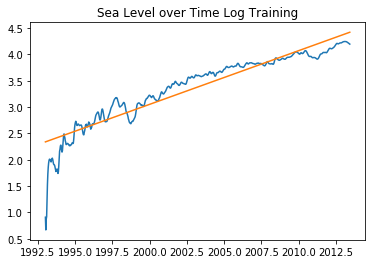

Mean squared error is: [0.04672378]


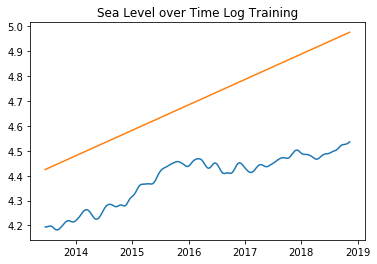

Mean squared error is: [0.10378841]


In [112]:
# Part c - data transformations #
# YOUR OWN TRANSFORMATION
import math

#Take log of the data set after adding 40 to the Y and B data set(level variations)

new_train = np.log(40+Y);
new_test = np.log(40+B);

###Train Data###
LR_log = LinearRegression().fit(X,new_train)
LR_log.score(X, new_train)

print("Coeffs:", LR_log.coef_)
print("Intercept:", LR_log.intercept_)

# Predict using OLS model

predict_vector = LR_log.coef_*X + LR_log.intercept_

plt.title ("Sea Level over Time Log Training")
plt.plot(X,new_train)
plt.plot(X,predict_vector)
plt.show()



print("Mean squared error is:" ,mean_squared_error(new_train,predict_vector, multioutput='raw_values'))



# Repeat parts a and b for your own transformation

###Test Data Set###
## Now apply the test data set
predict_vector_t = LR_log.coef_*A + LR_log.intercept_

plt.title ("Sea Level over Time Log Training")
plt.plot(A,new_test)
plt.plot(A,predict_vector_t)
plt.show()
print("Mean squared error is:" ,mean_squared_error(new_test,predict_vector_t, multioutput='raw_values'))







# Problem 2: K-Nearest Neighbors

Consider the following five two-dimensional training points, belonging to class + or class -:

$(0,1,+)$

$(1,1,-)$

$(2,2,+)$

$(2,0,+)$

$(3,1,-)$

**a.** Plot these five points. Then, draw the decision boundary for a **1-nearest-neighbor classifier (with Euclidean distance).** *Be sure to show or explain how you found your decision boundary.*

**b.** Classify the following test points, and add them to your plot:

$(0,0)$

$(1,2)$

$(2,1)$

$(3,3)$

$(4,3)$

*Be sure to explain how you classified the test points.*

**c.** As you may or may not have seen in part b, it is possible for two neighbors with different class labels to have identical distances to a test point. In that case, explain how to choose a class for this point.

**`[double click here to add a solution]`**

## Problem 3: Nearest Neighbors vs. Decision Trees

Not all machine learning algorithms perform well on all types of data; performance is often dependent on how the data is distributed. We ask you to compare the performance accuracies of k-nearest neighbors and decision trees on two datasets: the Iris dataset and the wine dataset.

The Iris flower dataset contains samples of attributes of 3 different variations of Iris flowers. This dataset has become very commonly used in training classification models. In fact, it has become so common that it exists within scikit-learn. The wine dataset contains attributes of 3 different types of wine. The datasets are imported and split into training and testing sets below for you. You can also get a preview of what they look like by running the two cells below.

**a.** Using the `KNeighborsClassifier` and `DecisionTreeClassifier` from scikit-learn, train and test k-nearest neighbors and decision trees on both datasets. When training the k-nearest neighbor algorithm, **do not choose a random number of neighbors, but instead *find the k that achieves the best accuracy in the range 1-10***. Compute the accuracies of each method (hint: you can use scikit-learn's `metrics.accuracy_score`).

**b.** Compare the accuracies of each algorithm on each dataset. **If there is a difference in their performance, why do you think this would be?**

*Please note that since sampling of data is random, accuracies may differ when you run the code again, and they will differ among your peers.*

In [113]:
# Import Iris dataset from scikit-learn, as well as algorithms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Split data into training and testing sets
X = iris.data
y = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, test_size = 0.3) # here, our test set is 30% of whole set

# Show what Iris data looks like
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [114]:
# Load wine dataset
wine_df = pd.read_csv("wine.csv", names = ["class", "alc", "malic acid", "ash", "alcalinity", "mg", "phenols", "flavanoid", "nonflav phenols", "proanth", "color", "hue", "OD280/OD315", "proline"])

# Split dataset into train and test sets
X = wine_df
y = wine_df.pop('class')

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, test_size = 0.3)

# Show what wine dataset looks like
wine_df.head()

,alc,malic acid,ash,alcalinity,mg,phenols,flavanoid,nonflav phenols,proanth,color,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [115]:
# IRIS DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set

Max_accuracy = 0;
K = 0;

for i in range (1,11):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_iris_train,y_iris_train)
    y_predict = neigh.predict(X_iris_test)

    accuracy = metrics.accuracy_score(y_iris_test, y_predict)
    
    if(accuracy > Max_accuracy):
        Max_accuracy = accuracy
        K = i


    print("K value is: ",i," the accuracy is: ",accuracy)
    
print("highest K value:",K, " the accuracy is: ", Max_accuracy)




# Construct a decision tree on the training data.
# Test decision tree with testing set
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_iris_train, y_iris_train)
clf_predict = clf.predict(X_iris_test)

tree_accuracy = metrics.accuracy_score(y_iris_test, clf_predict)

print("The accuracy for the tree is: ",tree_accuracy)




# Compare accuracies between the two algorithms (print them out)
print("KNN: highest K value:",K, " the accuracy is: ", Max_accuracy)
print("DECISION TREE: The accuracy for the tree is: ",tree_accuracy)



K value is:  1  the accuracy is:  0.9333333333333333
K value is:  2  the accuracy is:  0.9333333333333333
K value is:  3  the accuracy is:  0.9555555555555556
K value is:  4  the accuracy is:  0.9555555555555556
K value is:  5  the accuracy is:  0.9333333333333333
K value is:  6  the accuracy is:  0.9777777777777777
K value is:  7  the accuracy is:  0.9555555555555556
K value is:  8  the accuracy is:  0.9777777777777777
K value is:  9  the accuracy is:  1.0
K value is:  10  the accuracy is:  1.0
highest K value: 9  the accuracy is:  1.0
The accuracy for the tree is:  0.9777777777777777
KNN: highest K value: 9  the accuracy is:  1.0
DECISION TREE: The accuracy for the tree is:  0.9777777777777777


In [116]:
# WINE DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set

Max_accuracy_wine = 0;
K_wine = 0;

for i in range (1,11):
    
    neigh_wine = KNeighborsClassifier(n_neighbors=i)
    neigh_wine.fit(X_wine_train,y_wine_train)
    y_wine_predict = neigh_wine.predict(X_wine_test)

    accuracy_wine = metrics.accuracy_score(y_wine_test, y_wine_predict)
    
    if(accuracy_wine > Max_accuracy_wine):
        Max_accuracy_wine = accuracy_wine
        K_wine = i


    print("K value is: ",i," the accuracy is: ",accuracy_wine)
    
print("highest K value:",K, " the accuracy is: ", Max_accuracy_wine)


# Construct a decision tree on the training data
# Test decision tree with testing set

clf_wine = tree.DecisionTreeClassifier()
clf_wine = clf_wine.fit(X_wine_train, y_wine_train)
clf_predict_wine = clf_wine.predict(X_wine_test)

tree_wine_accuracy = metrics.accuracy_score(y_wine_test, clf_predict_wine)

print("The accuracy for the tree is: ",tree_wine_accuracy)




# Compare accuracies between the two algorithms (print them out)
print("KNN: highest K value:",K, " the accuracy is: ", Max_accuracy_wine)
print("DECISION TREE: The accuracy for the tree is: ",tree_wine_accuracy)




K value is:  1  the accuracy is:  0.7222222222222222
K value is:  2  the accuracy is:  0.7037037037037037
K value is:  3  the accuracy is:  0.7222222222222222
K value is:  4  the accuracy is:  0.7407407407407407
K value is:  5  the accuracy is:  0.7037037037037037
K value is:  6  the accuracy is:  0.6666666666666666
K value is:  7  the accuracy is:  0.6851851851851852
K value is:  8  the accuracy is:  0.7037037037037037
K value is:  9  the accuracy is:  0.7037037037037037
K value is:  10  the accuracy is:  0.6481481481481481
highest K value: 9  the accuracy is:  0.7407407407407407
The accuracy for the tree is:  0.8703703703703703
KNN: highest K value: 9  the accuracy is:  0.7407407407407407
DECISION TREE: The accuracy for the tree is:  0.8703703703703703


**`[double click here to add a solution to part b]`**
b)For the Iris dataset, KNN's performance was better than the wine data set. In this case, Iris has features that has values similar to each other, which means the boundary is not very clear. Therefore, the KNN performs better that could define the decision boundary that is not very simple straight line.

For Wine dataset, the Decision Tree performs better. Because the wine dataset has feautres values that have bigger differences to the other features' values. In other words, alc feature and phenol feature has very big or different range of values. Phenol is around 2.8 whereas alc is around 14 or 15. Because the difference each feature are very clear that decision boundary could distinguish the values with simple yes/no or right/wrong process. That way, wine dataset is better performance with the decision boundary.

Moreover, The Decision Tree for Iris is not good performance because it might overfits the dataset that has simple feature. On the other hand wine has much more features so that decision tree has depth to decide and go over the classification more precisely where as KNN is only classifies to the similar points of the dataset, not precise enough.





## Problem 4: Curse of Dimensionality and Nearest Neighbors

**Please note that you may find it easier to program this question in MATLAB. If you choose to use MATLAB, please submit a separate .m file with your code solution and either insert your plots into Jupyter (or, submit a separate document with the plots through Blackboard).**

Consider $n$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin, and suppose we are interested in nearest neighbors to the origin. It can be shown that the median distance from the origin to the closest data point under this scenario is given by the expression $(1-(\frac{1}{2})^{\frac{1}{n}})^{\frac{1}{p}}$. 

Now consider the following alternative scenario. Suppose $n$ data points are chosen uniformly
from $[−1, 1]^p$ (the interval $[−1, 1]$ in p dimensions). Now consider the nearest neighbor to a point at the origin in terms of the $l_∞$ norm: $\|x − y\|_∞ = max_i|x_i − y_i|$.

**a.** Write a piece of code that generates $n$ data points in $p$ dimensions distributed uniformly
in $[−1, 1]^p$, and computes the $l_∞$ nearest neighbors to the origin. For $n = 5$, $n = 50$, and $n = 500$, plot the nearest neighbor distances as a function of $p$, for $p = 1$ to $200$. On the same plot(s), also show the curves corresponding to the median distance expression given above.

**b.** What do you observe about the relationship between the formula and the $l_∞$ nearest neighbor distances? *Discuss and interpret all of your plots.*

**c. *Bonus*** Prove a relationship between the ∞ nearest neighbor distances and the above formula.

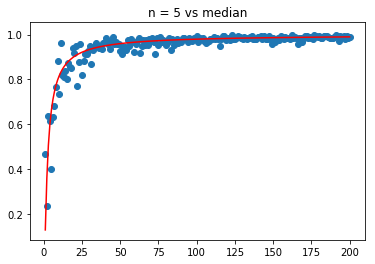

[0.7799149  0.68796308 0.41820444 0.57101295 0.99805196 0.88450843
 0.96866486 0.94443484 0.91068735 0.8740143  0.82707157 0.94598492
 0.92632466 0.94720921 0.9527303  0.99172565 0.82285035 0.94408071
 0.96093189 0.8282854  0.96846328 0.95678853 0.96694804 0.94388823
 0.99817899 0.98797012 0.92294101 0.99047588 0.99360767 0.91803629
 0.97907467 0.97632717 0.98340887 0.99771265 0.99720984 0.95057218
 0.98598467 0.98963184 0.93170065 0.9992156  0.97192836 0.99891477
 0.94808292 0.98702364 0.98206816 0.99221138 0.98758495 0.95530254
 0.97563514 0.99659663 0.9831748  0.97969535 0.99126948 0.96359136
 0.99611731 0.99508903 0.99598055 0.99588509 0.9999315  0.98167544
 0.97146555 0.98488313 0.99575866 0.99135374 0.97788437 0.99632792
 0.96357842 0.99274806 0.96553254 0.9932553  0.98715349 0.9947047
 0.98719582 0.99980663 0.97981574 0.99412002 0.98563697 0.99431421
 0.98408707 0.99811395 0.94963301 0.9949597  0.9945725  0.99012031
 0.99900648 0.99308507 0.98228179 0.9886414  0.99237288 0.98487

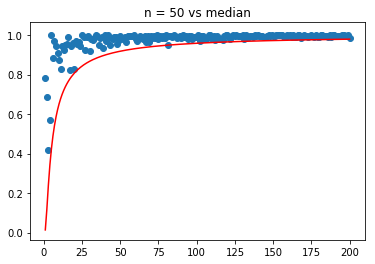

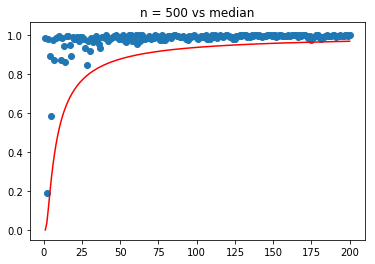

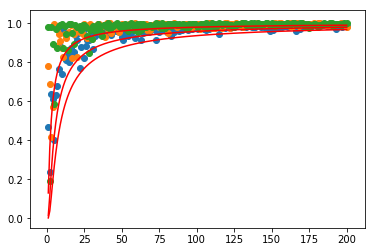

In [121]:
# Plot n p-dimensional uniformly-distributed data points
from numpy import linalg as LA



PX = np.linspace(1,200,200)
median_5 = (1-0.5**(1/5))**(1/PX)
median_50 = (1-0.5**(1/50))**(1/PX)
median_500 = (1-0.5**(1/500))**(1/PX)

min_norm = 2

arr5 = np.zeros(200)


for p in range(1,201): # in each dimension find the 5 nearest points
    
    for i in range(5):
        s = np.random.uniform(-1,1,p)
        new_d = LA.norm(s,np.inf)
        if(new_d < min_norm): #find the min value in the norm
            min_norm = new_d
    arr5[p-1] = min_norm
    min_norm = 2   


plt.scatter(PX,arr5)
plt.plot(PX,median_5,'r')
plt.title("n = 5 vs median")
plt.show()


min_norm = 2

arr50 = np.zeros(200)

for p in range(1,201):
    
    for i in range(50):
        s = np.random.uniform(-1,1,p)
        new_d = LA.norm(s,np.inf)7
        if(new_d < min_norm):
            min_norm = new_d
    arr50[p-1] = new_d
    min_norm = 2 

print(arr50)
plt.scatter(PX,arr50)
plt.plot(PX,median_50,'r')
plt.title("n = 50 vs median",)
plt.show()


arr500 = np.zeros(200)
min_norm = 0


for p in range(1,201):
    
    for i in range(500):
        s = np.random.uniform(-1,1,p)
        new_d = LA.norm(s,np.inf)
        if(new_d < min_norm):
            min_norm = new_d
    arr500[p-1] = new_d
    min_norm = 2
   


plt.scatter(PX,arr500)
plt.plot(PX,median_500,'r')
plt.title("n = 500 vs median")
plt.show()




# Compute nearest neighbors to the origin in terms of maximum norm

#plt scatter

plt.scatter(PX, arr5, label="n = 5 points")
plt.plot(PX, median_5, label="Median5 formula", color="red")
plt.scatter(PX, arr50, label="n = 50 points")
plt.plot(PX, median_50, label="Median50 formula", color="red")
plt.scatter(PX, arr500, label="n = 500 points")
plt.plot(PX, median_500, label="Median500 formula", color="red")
plt.show()




# Plot nearest neighbor distances as a function of p = 1:200 for n = 5, 50, 500. Plot curves 
# corresponding to the median distance expression on the same figure.

**`[double click here to add plots, if you programmed your solution outside Jupyter]`**

b) According to the three graphs above, as the dimension gets higher, or as the p value gets larger, the l(inf) has less difference with the median formula. Also, the graph shows as the feature increases or p increases by small amount, the bump jumps very high. Which means, the norm is very sensitive by the change or increase of the features. 

